In [45]:
import netCDF4 as nc
#d=xr.Dataset({'qvLsat':qvLsat,'tempL':tempL,'pressL':pressL})
#d.to_netcdf('qvLsat.nc',encoding={'qvLsat':{'zlib':True,'complevel':5},'tempL':{'zlib':True,'complevel':5},'pressL':{'zlib':True,'complevel':5}})
with nc.Dataset('qvLsat.nc') as f:
    qvLsat=f['qvLsat'][:]
    tempL=f['tempL'][:]
    pressL=f['pressL'][:]
    
import numpy as np
xL=np.stack(((tempL-244)/33,(pressL-40000)/28000),axis=1)

In [46]:
xL.mean(axis=0)
xL.std(axis=0)
print(qvLsat.mean(axis=0))
yL=np.log(1+qvLsat[:,1:3]/0.0001)
# define tensorflow regression feedforward neural network with 2 hidden layers and one output layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

def model():
    model=keras.Sequential()
    model.add(Dense(32,activation='relu',input_dim=2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(2,activation='linear'))
    return model

qvsat_model=model()
qvsat_model.compile(optimizer='adam',loss=losses.MeanSquaredError(),metrics=[metrics.MeanSquaredError()])

[0.00261346 0.00551145 0.00541634]


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xL,yL,test_size=0.2,random_state=42)


In [64]:
qvsat_model.fit(x_train,y_train,epochs=10,batch_size=127,validation_data=(x_test,y_test))


Epoch 1/10
17230/17230 [==============================] - 9s 502us/step - loss: 7.5039e-06 - mean_squared_error: 7.5039e-06 - val_loss: 4.4808e-06 - val_mean_squared_error: 4.4808e-06
Epoch 2/10
17230/17230 [==============================] - 9s 495us/step - loss: 7.5131e-06 - mean_squared_error: 7.5131e-06 - val_loss: 8.0755e-05 - val_mean_squared_error: 8.0755e-05
Epoch 3/10
17230/17230 [==============================] - 9s 496us/step - loss: 7.2138e-06 - mean_squared_error: 7.2138e-06 - val_loss: 3.1882e-06 - val_mean_squared_error: 3.1882e-06
Epoch 4/10
17230/17230 [==============================] - 9s 497us/step - loss: 7.0778e-06 - mean_squared_error: 7.0778e-06 - val_loss: 2.8244e-06 - val_mean_squared_error: 2.8244e-06
Epoch 5/10
17230/17230 [==============================] - 9s 495us/step - loss: 6.7907e-06 - mean_squared_error: 6.7907e-06 - val_loss: 4.1110e-06 - val_mean_squared_error: 4.1110e-06
Epoch 6/10
17230/17230 [==============================] - 9s 496us/step - loss: 

In [65]:
y_=qvsat_model.predict(x_test)

17096/17096 [==============================] - 5s 266us/step


/Users/mgrecu/miniconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


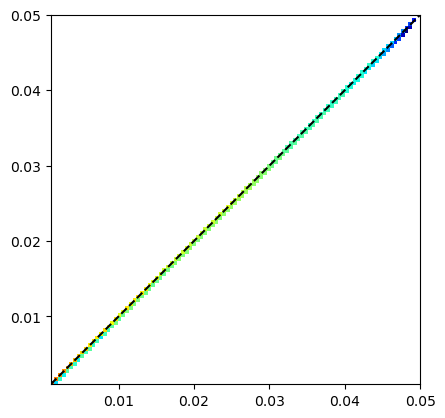

In [71]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
ax=plt.subplot(111)
hd=plt.hist2d(0.0001*(np.exp(y_test[:,0])-1),0.0001*(np.exp(y_[:,0])-1),bins=100,norm=colors.LogNorm(),cmap='jet')
plt.plot([0,0.05],[0,0.05],'k--')
ax.set_aspect(1)
plt.ylim(0.02,0.05)
plt.xlim(0.02,0.05)
plt.xlim(0.001,0.05)
plt.ylim(0.001,0.05)
qvsat_model.save('qvsat_model.h5')
qvsat_model.save('qvsat_model.keras')

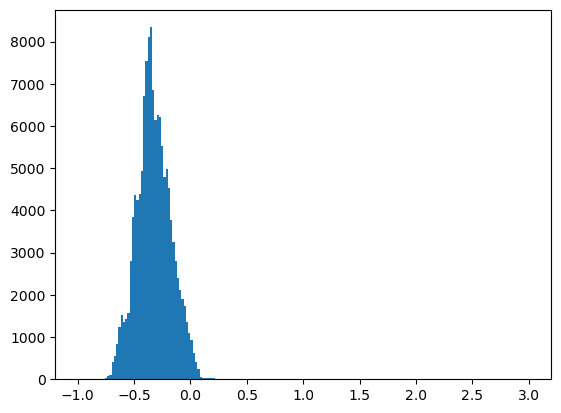

In [69]:
y_test_t=0.0001*(np.exp(y_test[:,:])-1)
y_t_=0.0001*(np.exp(y_[:,:])-1)
a=np.nonzero(y_test_t[:,0]>0.008)
h1d=plt.hist((y_t_[a[0],0]/y_test_t[a[0],0]-1)*100,bins=-1+np.arange(201)*0.02)

0.6291745379691571
308.6869
89618.516


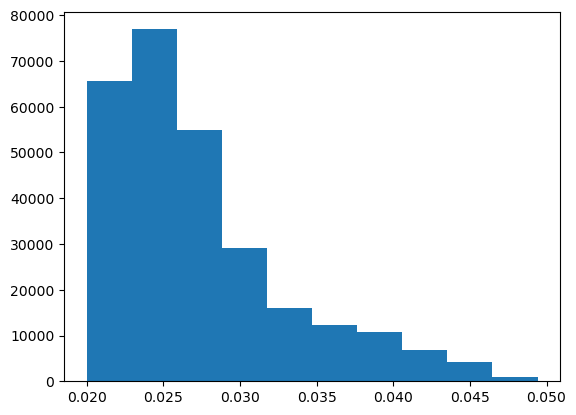

In [44]:
print((y_[a[0],0].mean()/y_test[a[0],0].mean()-1)*100)
plt.hist(qvLsat[a[0],1])
a=np.nonzero(qvLsat[:,1]>0.04)
print(tempL[a[0]].mean())
print(pressL[a[0]].mean())